In [ ]:
!mkdir rabbits
!mkdir crop


mkdir: cannot create directory ‘rabbits’: File exists
mkdir: cannot create directory ‘crop’: File exists


In [ ]:
%cd crop
!unzip crop.zip
%cd ..


In [ ]:
!rm -rf /content/crop/crop.zip

In [ ]:
!ls /content/crop/crop | wc -l #1007

1054


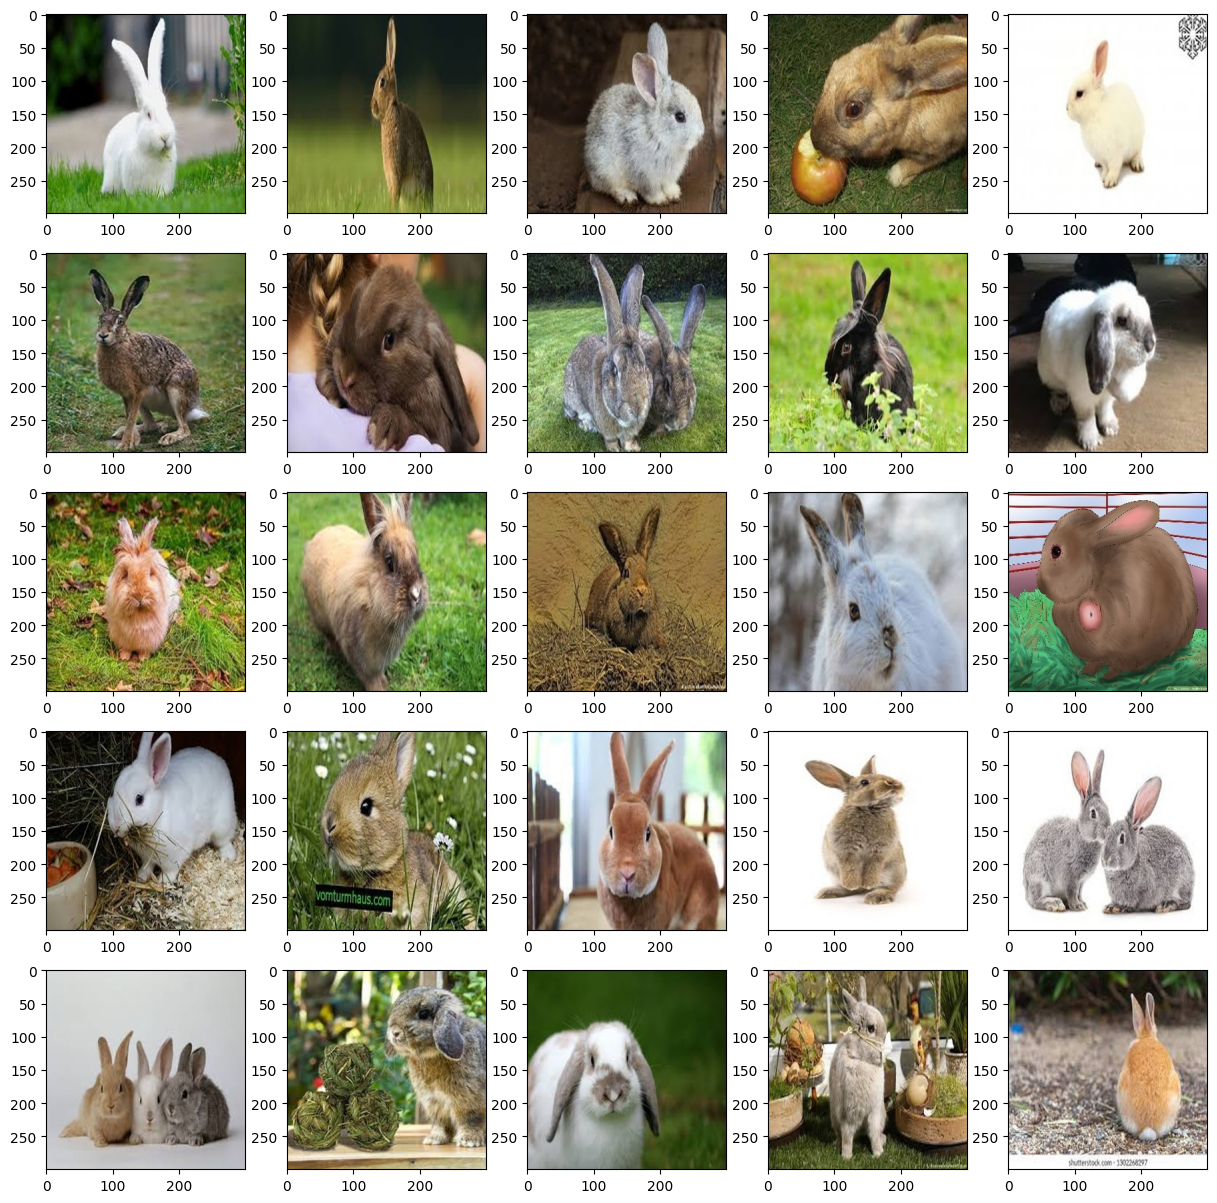

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/rabbits/rabbit'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [ ]:
!rm -rf /content/dataset/Crop

In [ ]:
#Crear carpetas para hacer el set de datos

!mkdir dataset
!mkdir dataset/Rabbit
!mkdir dataset/Crop

mkdir: cannot create directory ‘dataset’: File exists
mkdir: cannot create directory ‘dataset/Rabbit’: File exists


In [ ]:
import shutil
carpeta_fuente = '/content/rabbits/rabbit'
carpeta_destino = '/content/dataset/Rabbit'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  #Copia de la carpeta fuente a la destino
  shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/crop/crop'
carpeta_destino = '/content/dataset/Crop'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 1007:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
!ls /content/dataset/Crop | wc -l
!ls /content/dataset/Rabbit | wc -l

1007
1007


Found 1600 images belonging to 2 classes.
Found 414 images belonging to 2 classes.


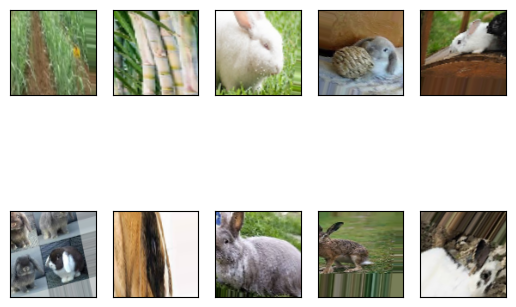

In [ ]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2056 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(100,100),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(100,100),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


In [ ]:
import tensorflow as tf

modeloCNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
 tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
modeloCNN.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
modeloCNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 128)     

In [ ]:
EPOCAS = 50

historial = modeloCNN.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/50
50/50 [==============================] - 13s 217ms/step - loss: 0.6317 - accuracy: 0.6831 - val_loss: 0.3354 - val_accuracy: 0.8841
Epoch 2/50
50/50 [==============================] - 27s 543ms/step - loss: 0.4099 - accuracy: 0.8156 - val_loss: 0.2245 - val_accuracy: 0.8986
Epoch 3/50
50/50 [==============================] - 10s 197ms/step - loss: 0.3272 - accuracy: 0.8537 - val_loss: 0.2782 - val_accuracy: 0.8913
Epoch 4/50
50/50 [==============================] - 11s 225ms/step - loss: 0.2982 - accuracy: 0.8719 - val_loss: 0.1412 - val_accuracy: 0.9517
Epoch 5/50
50/50 [==============================] - 11s 214ms/step - loss: 0.2627 - accuracy: 0.8950 - val_loss: 0.1525 - val_accuracy: 0.9493
Epoch 6/50
50/50 [==============================] - 11s 214ms/step - loss: 0.2351 - accuracy: 0.9150 - val_loss: 0.1884 - val_accuracy: 0.9300
Epoch 7/50
50/50 [==============================] - 11s 213ms/step - loss: 0.2595 - accuracy: 0.8938 - val_loss: 0.1605 - val_accuracy: 0.9372

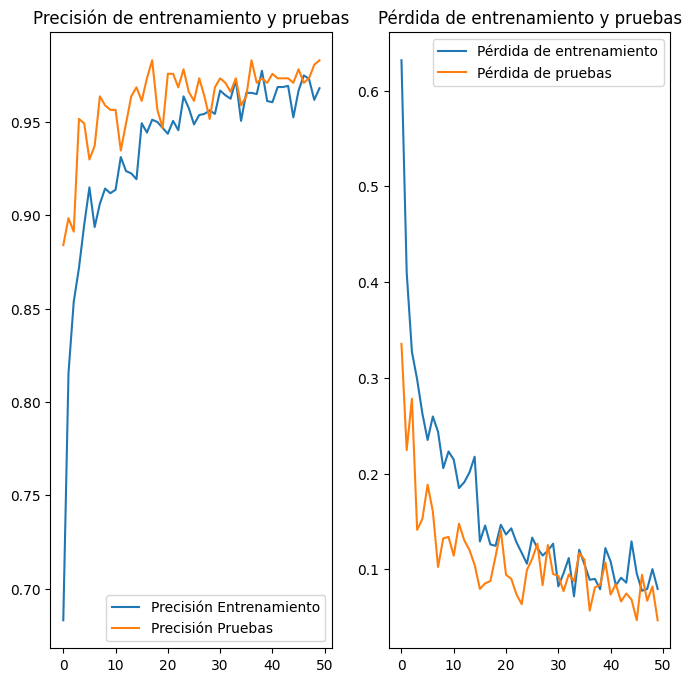

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
modeloCNN.save('/content/modelo1.h5')


In [ ]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (100,100))
  prediccion = modeloCNN.predict(img.reshape(-1, 100, 100, 3))
  return np.argmax(prediccion[0], axis=-1)


In [ ]:
#0 = conejo, 1 = No,
url = 'https://graciasnaturaleza.com/wp-content/uploads/2022/08/tipos-de-cesped-kikuyu.jpg'
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 0s 20ms/step
0
